# Business Decision Project (A/B Test) 

You are an analyst at a big online store. Together with the marketing department, you've
compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.core.reshape.concat import concat
import scipy.stats as stats
import datetime as dt
import math
import random
from functools import reduce


pd.options.display.max_colwidth = 150

hypotheses=pd.read_csv('/datasets/hypotheses_us.csv',sep=';' )
orders=pd.read_csv('/datasets/orders_us.csv')
visits=pd.read_csv('/datasets/visits_us.csv')


FileNotFoundError: [Errno 2] File /datasets/hypotheses_us.csv does not exist: '/datasets/hypotheses_us.csv'

 We have import all the data and will gona use head and info to get familiar with the data.

In [3]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


 Hypotheses table is actualy nine rows table with nine hypotesis and their values for Reach, Impact,Confidence and Effort.

In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
orders.group.value_counts()

B    640
A    557
Name: group, dtype: int64

"Make sure to preprocess the data. There might be mistakes in the original datasets; for
 example, some of the visitors might have gotten into both group A and group B."


In [8]:
users_group=orders.groupby('visitorId').agg({'group':'nunique'})
users_one_group=users_group.query('group<=1')
orders=orders[orders['visitorId'].isin(users_one_group.index)]
orders['group'].value_counts()                                       
                                       

B    548
A    468
Name: group, dtype: int64

we have filtered only users that belongs only to one group, dropped those who are in bolth...

In [9]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

 checked two last data sets for missing values, there is no missing values at all

# Part 1. Prioritizing Hypotheses

 The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue
with Reach, Impact, Confidence, and Effort specified for each.
 The task is to:
 * Apply the ICE framework to prioritize hypotheses. Sort them in descending order of
 priority.
 * Apply the RICE framework to prioritize hypotheses. Sort them in descending order of
priority.
 * Show how the prioritization of hypotheses changes when you use RICE instead of ICE.
Provide an explanation for the changes.

from the theory..." ICE and RICE
Impact, confidence, effort/ease (ICE is one of the most popular ways of
prioritizing problems: ICE score = (Impact x Confidence) / Effort
There's also a modified version, RICE: RICE score = (Reach x Impact x Confidence)"

 So, we are going to calculate ICE and RICE and add them  like two separate new columns to the existing hypoteses data set

In [13]:
hypotheses['ICE']=(hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']

In [14]:
hypotheses['RICE']=(hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']

In [15]:
hypotheses.sort_values(by=['ICE'], ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


Hypotheses sorted by ICE from higher to lower priority order...

In [16]:
hypotheses.sort_values(by=['RICE'], ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


 Hypotheses sorted by RICE from higher to lower priority order...

Ok so now we want to discuss  results, but first we need to give some explanations of Reach, Impact,Confidence and Effort,

Reach — how many users will be affected by the update you want to
introduce
Impact — how strongly this update will affect the users, their experience, and
their satisfaction with the product
Confidence — how sure you are that your product will affect them in this way
Effort — how much will it cost to test the hypothesis


 For the ICE score we have the following order in descending: 8,0,7,6,2...etc.
 8-Launch a promotion that gives users discounts on their birthdays , this hypotheses have highest values for   Impact and 
Confidence
 0-Add two new channels for attracting traffic. This will bring 30% more users	
 7-Add a subscription form to all the main pages. This will help you compile a mailing list	
 6-Show banners with current offers and sales on the main page. This will boost conversion	
 2-Add product recommendation blocks to the store's site. This will increase conversion and average purchase size	 

 For RICE score we have the following order in descending:7,2,0,6,8...etc.
 value so it holds first place in RICE table.


 



# Part 2. A/B Test Analysis

 You carried out an A/B test and got the results described in the
 files orders_us.csv and visits_us.csv.
 Task
Analyze the A/B test:
 1. Graph cumulative revenue by group. Make conclusions and conjectures.
 2. Graph cumulative average order size by group. Make conclusions and conjectures.
 3. Graph the relative difference in cumulative average order size for group B compared
 with group A. Make conclusions and conjectures.

In [17]:
import datetime as dt
from pandas.core.reshape.concat import concat
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null object
revenue          1016 non-null float64
group            1016 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 47.6+ KB


In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


 First, we need to convert date columns into apropriate format...

In [19]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null float64
group            1016 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


...and same with visits...

In [20]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In order To plot the graphs, we have to collect cumulative data... we will make new data frame named "cumulativeData" with 

 following columns: date,  group, orders,  buyers,  revenue,  visitors

 We are gonna use drop duplicates to build an array with unique paired date-group values...

In [21]:
datesGroups = orders[['date','group']].drop_duplicates() 

In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

 now gonna do the same with second table, visits...

In [23]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group']) 

 Now we will merge these two into one table...

In [24]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


 Now we are ready to plot our data...cumulative revenue by date

 #### 1. Graph cumulative revenue by group. Make conclusions and conjectures.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


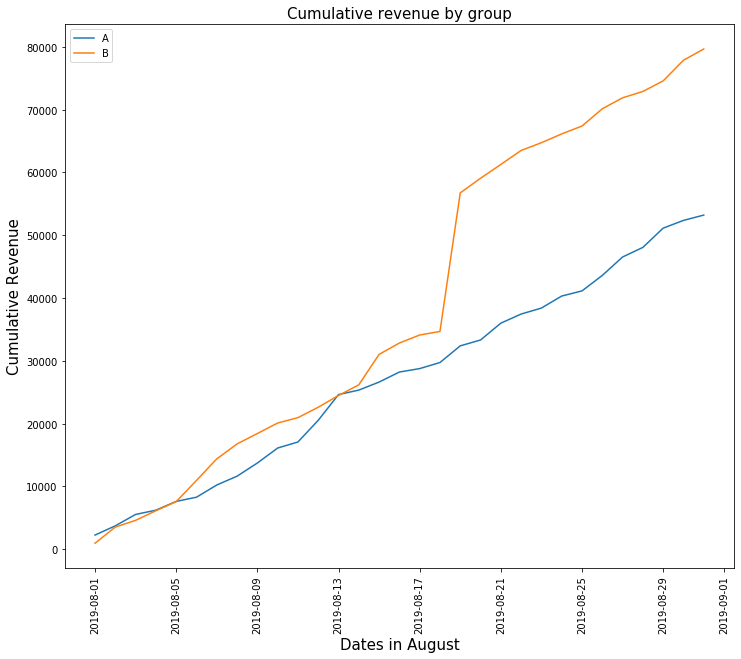

In [25]:
import matplotlib.pyplot as plt


cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,10)) 
plt.xticks(rotation=90) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');

 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.title('Cumulative revenue by group',fontdict={'size':15})
plt.xlabel('Dates in August',fontdict={'size':15})
plt.ylabel('Cumulative Revenue',fontdict={'size':15})

plt.legend() ;

 Revenue is rising steadily throughout the whole test, both groups have similiar dynamics.

#### 2. Graph cumulative average order size by group. Make conclusions and conjectures.

 Now we are gonna graph cumulative average order size by group. Make conclusions and conjectures.

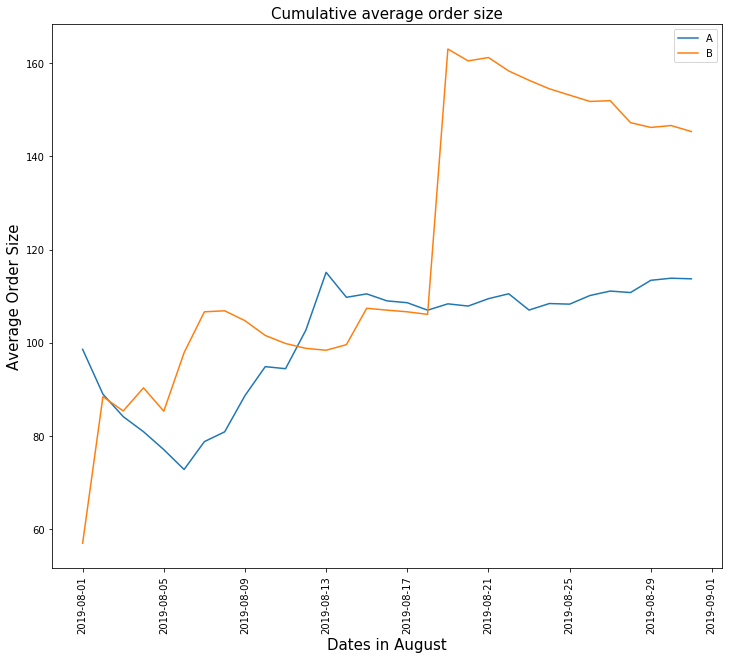

In [26]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=90) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Cumulative average order size',fontdict={'size':15})
plt.xlabel('Dates in August',fontdict={'size':15})
plt.ylabel('Average Order Size',fontdict={'size':15})

plt.legend();


 From the graph we can make conclusions that average order size is rising in the bolth groups and  in the group B
 after hard spike  it tends to fall.

#### 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures



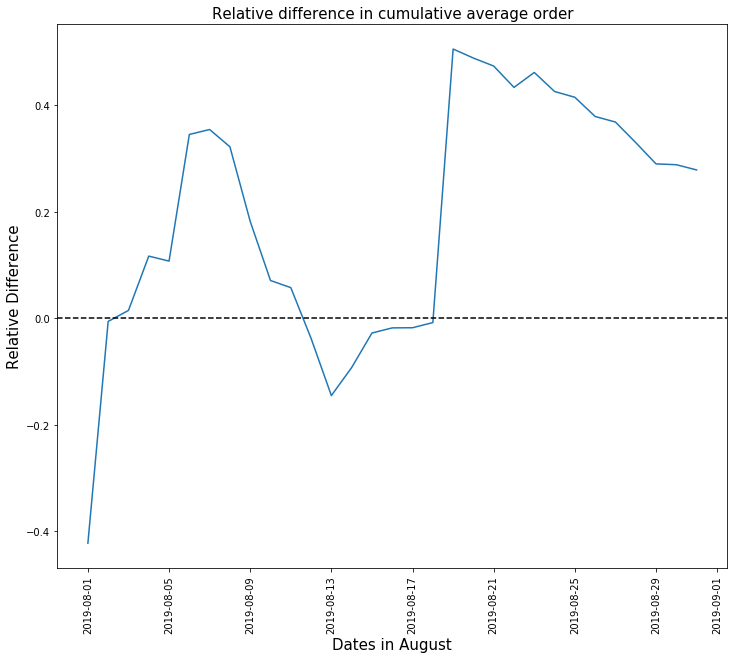

In [27]:

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,10))
plt.xticks(rotation=90) 

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.title('Relative difference in cumulative average order',fontdict={'size':15})
plt.xlabel('Dates in August',fontdict={'size':15})
plt.ylabel('Relative Difference',fontdict={'size':15})
plt.axhline(y=0, color='black', linestyle='--');

There is  the difference between the segments spikes.Probably there  must be some big orders and outliers

#### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates

 #### of the two groups and describe the difference. Draw conclusions and make conjectures.

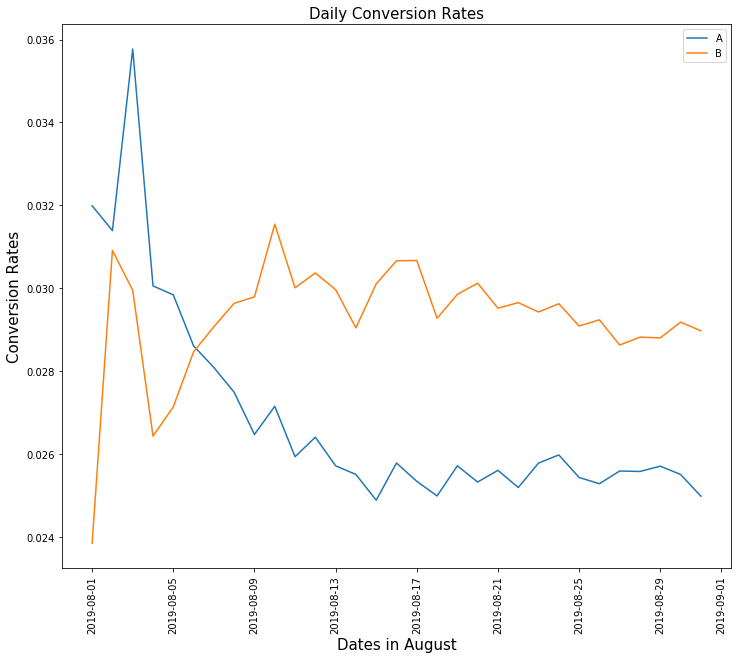

In [28]:

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,10))
plt.xticks(rotation=90) 
plt.title('Daily Conversion Rates',fontdict={'size':15})
plt.xlabel('Dates in August',fontdict={'size':15})
plt.ylabel('Conversion Rates',fontdict={'size':15})
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

#plt.axis(["2019-08-02", '2019-08-31', 0, 0.015]) 

#### Let's plot a relative difference graph for the cumulative conversion rates:

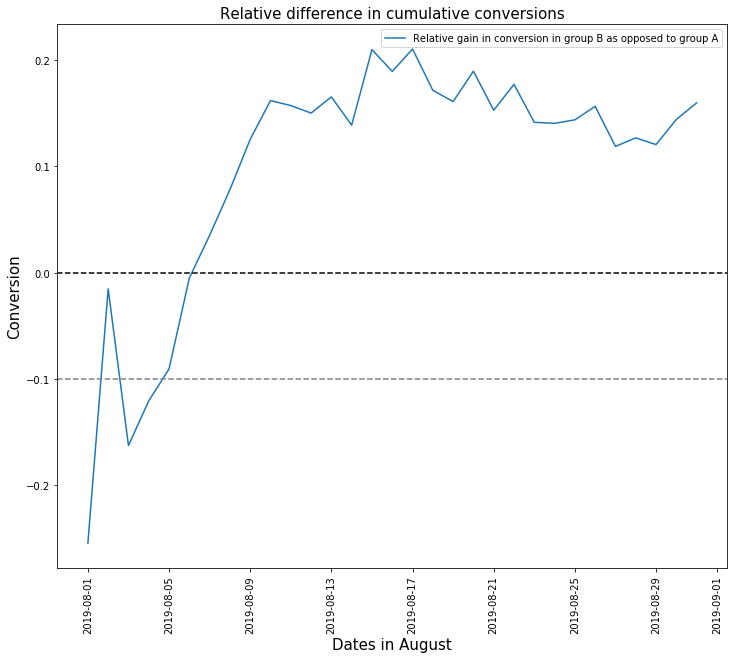

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,10))
plt.xticks(rotation=90) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()
plt.title('Relative difference in cumulative conversions',fontdict={'size':15})
plt.xlabel('Dates in August',fontdict={'size':15})
plt.ylabel('Conversion',fontdict={'size':15})

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.1, color='grey', linestyle='--');

At the begining group B was leading then A took a lead for a while then B again and from there its only A that is leading significantly.

It stays somewhere between 15-20% and looks like its stabilising there.

#### 5. Plot a scatter chart of the number of orders per user. Make conclusions and
#### conjectures

To get the results we will make new data frame with two columns: visitorId and orders

In [30]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))



      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Now we will gonna plot a scatter chart of orders per users

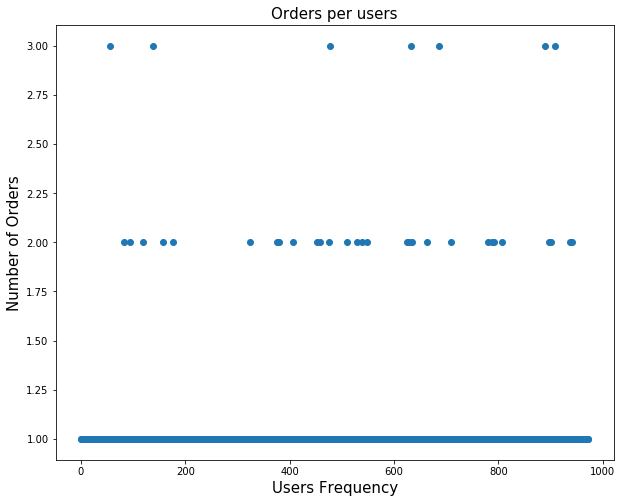

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,8))
plt.title('Orders per users',fontdict={'size':15})
plt.xlabel('Users Frequency',fontdict={'size':15})
plt.ylabel('Number of Orders',fontdict={'size':15})
plt.scatter(x_values,ordersByUsers['orders'] );

From the graph we can see that the most of the users made one  order, then smaller group made two ,the rest three.

#### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the
#### point at which a data point becomes an anomaly.


In [32]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


 No more that 5% that made more than 1 orders and not more than one percent that made more than  2 orders

Everything more than one order is abnormal

#### 7. Plot a scatter chart of order prices. Make conclusions and conjectures.


      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A
949      1347999392   887908475 2019-08-21    930.0     A
940      2420050534  4003628586 2019-08-08    905.8     B
613      4071177889  3931967268 2019-08-07    830.3     B


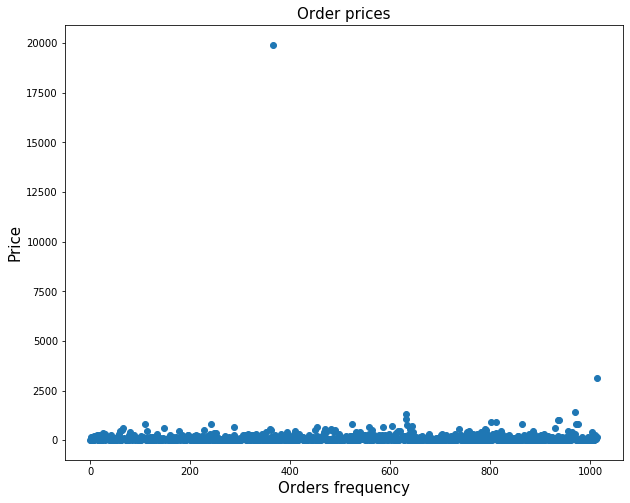

In [33]:
print(orders.sort_values(by='revenue',ascending=False).head(10))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,8))
plt.title('Order prices',fontdict={'size':15})
plt.xlabel('Orders frequency',fontdict={'size':15})
plt.ylabel('Price',fontdict={'size':15})
plt.scatter(x_values,orders['revenue']) ;

 From the scatter graph we can make conclusions that most of the orders are less than 900 dollars we have one arround 20000 

and one around 2500 as outliers...

#### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a
#### data point becomes an anomaly.

In [34]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[280.8   414.275 830.3  ]


No more than 5% placed orders that cost more than 414 dollars, No more 1% placed orders more expencive than 830 dollars

Everything more than 414$ should be abnormal

#### 9. Find the statistical significance of the difference in conversion between the groups
#### using the raw data. Make conclusions and conjectures

 Let's calculate the statistical significance of the difference in conversion between the groups.

 We'll create the variables ordersByUsersA and ordersByUsersB to store the columns ['visitorId', 'orders']. For users with at least

 one order, we'll indicate the number of orders made.

In [35]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

 Now we'll declare the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders. 

 Those who didn't order anything will have 0. 

#### alpha=0.05

#### HO="There is no significant difference in coversions between the groups"

#### H1="There is  significant difference in coversions between the groups"

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.006
0.160


First value is P-value which is much smaller than 0.05 so we can reject null hypothesis that said:

 "There is no significant difference in coversions between the groups"

#### 10.Find the statistical significance of the difference in average order size between the

#### groups using the raw data. Make conclusions and conjectures

* alpha=0.05
* HO="There is no significant difference in average order size between the groups"
* H1="There is significant difference in average order size between the groups"

In [38]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.431
0.278


 P-value is much bigger than 0.05 , so  we Fail to Reject the Null Hypothesis, but on the other side we do have relative difference of 0.278. is a relative gain of 27.8%, so  mean order size of group B is still larger by 27.8%...

#### 11. Find the statistical significance of the difference in conversion between the groups
#### using the filtered data. Make conclusions and conjectures.


* alpha=0.05
* HO="There is no significant difference in  conversion between the groups  using the filtered data"
* H1="There is significant difference in conversion between the groups  using the filtered data"

 First we need to determine anomalous users as all users that place more than 2 orders or make one order bigger than 2500

 dollars...

In [39]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 930]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099     148427295
33       249864742
58       611059232
744      888512513
1103    1164614297
Name: visitorId, dtype: int64
(14,)


 We have 14 anomal users in total...
 Let's try to find out how their actions affected the test results. We'll calculate the statistical significance of the differences in
 conversion between the groups, using filtered data. First we'll prepare samples of the number of orders per user
 for each test group:

In [40]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

 Let's apply the statistical Mann-Whitney criterion to the resulting samples:


In [41]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.004
0.189


P is lowe than alpha so we are accepting HO, There is no significant difference in conversion between the groups using the filtered data

 We have received almost same results as with unfiltered data,  Let's see what happens to the values for average order size:

#### 12. Find the statistical significance of the difference in average order size between the
#### groups using the filtered data. Make conclusions and conjectures.


* alpha=0.05
* HO="There is no significant difference in  average order size between the groups  using the filtered data"
* H1="There is significant difference in average order size between the groups  using the filtered data"

In [42]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.407
-0.035


 The p-value increased, but now the difference between the segments is 4% instead of 18%.We are rejecting HO so : There is significant difference in average order size between the groups using the filtered data.
 Also from the Graph Relative difference in cumulative conversions we can see that the B group is much better and its going to be stable so we can stop the test by saiying that the B group is a winner.

 13. Make a decision based on the test results. The possible decisions are: 1. Stop the test,
 consider one of the groups the leader. 2. Stop the test, conclude that there is no
 difference between the groups. 3. Continue the test.

 From all of this we can make some final conclusions.Especialy when we take a look at the  Graph of Relative difference in cumulative conversions we can see that the B group is much better ( arround 15%) and its going to be stable so we can stop the test by saiying that the B group is a winner.

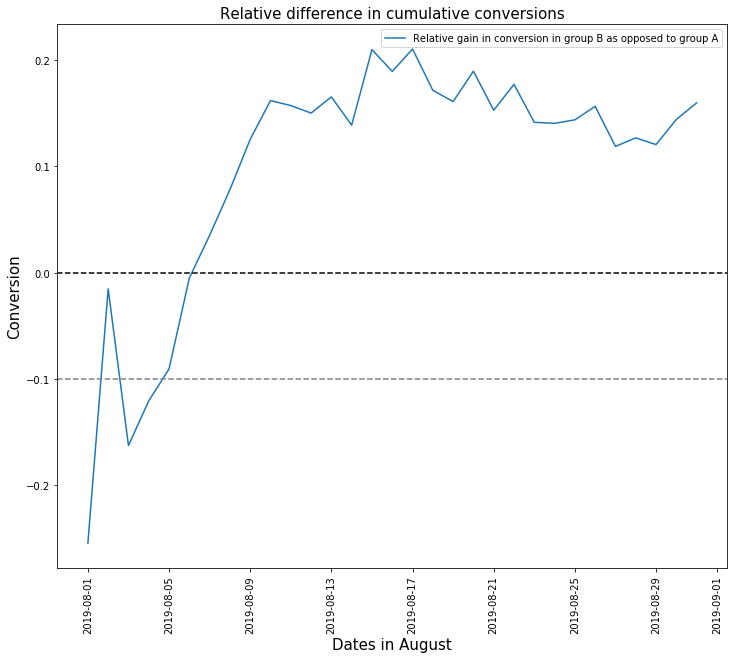

In [43]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,10))
plt.xticks(rotation=90) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()
plt.title('Relative difference in cumulative conversions',fontdict={'size':15})
plt.xlabel('Dates in August',fontdict={'size':15})
plt.ylabel('Conversion',fontdict={'size':15})

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.1, color='grey', linestyle='--');

<div class="alert alert-warning">
<b>Reviewer's comment v3: </b> Very good! I recommend you not to use "much better" as an assessment because it's uncountable. Some percent values would be better in this case. But in general - good job! Thank you for your research.
</div>